In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets


## 1- Load and prepare Data

In [2]:
raw_data = datasets.load_digits()

In [3]:
len(raw_data.images)

1797

In [4]:
raw_data.images[:1]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]])

In [5]:
raw_data.images[1].shape

(8, 8)

1

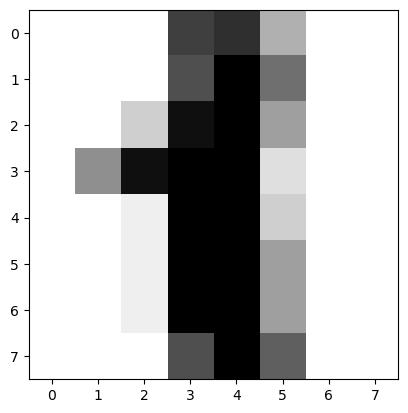

In [6]:
plt.imshow(raw_data.images[1], cmap='gray_r')
raw_data.target[1]

In [7]:
data = list(zip(raw_data.images, raw_data.target))

In [8]:
data[285][1]

9

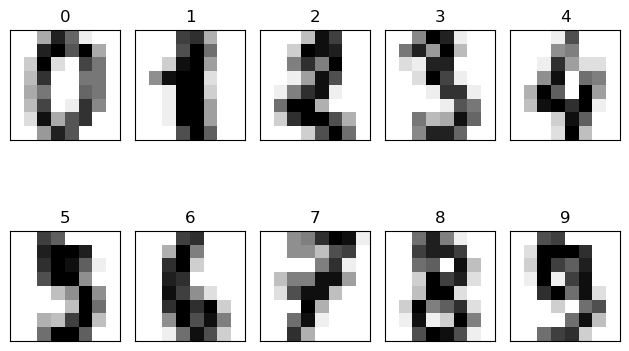

In [9]:
for i, (image, label) in enumerate(data[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.tight_layout()


In [10]:
raw_data.images.shape

(1797, 8, 8)

In [11]:
# Flatten Image:
X = raw_data.images.reshape(len(raw_data.images), -1)

In [12]:
X.shape

(1797, 64)

In [13]:
y = raw_data.target

In [14]:
y.shape

(1797,)

In [15]:
data = list(zip(X, raw_data.target))

In [16]:
data[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X.max()

16.0

In [20]:
X_scaled.max()

1.0

## 2- SVC Classifier

* Support Vectors: Support vectors are the data points closest to the hyperplane. These data points will be used to define the dividing line.
  
* Hyperplane: It is a decision plane or space that is divided between a collection of objects with various class designations.
  
* Margin: The distance between two lines on the closet data points of various classes can be used to define margin. The perpendicular distance between the line and the support vectors can be used to calculate it. A large margin is considered good, whereas a small margin is considered bad.

### SVM Application

* Protein Structure Prediction
* Intrusion Detection
* Handwriting Recognition
* Detecting Steganography in digital images
* Breast Cancer Diagnosis
* Almost all the applications where ANN is used

### Pros

* SVM classifiers perform well in high-dimensional space and have excellent accuracy. 

* SVM classifiers require less memory because they only use a portion of the training data.

* SVM performs reasonably well when there is a large gap between classes.

* High-dimensional spaces are better suited for SVM.

* When the number of dimensions exceeds the number of samples, SVM is useful.

* SVM uses memory effectively.

### CONS:

* SVM requires a long training period; as a result, it is not practical for large datasets.

* The inability of SVM classifiers to handle overlapping classes is another drawback.

* Large data sets (High Dimension) are not a good fit for the SVM algorithm.

* When the data set contains more noise, such as overlapping target classes, SVM does not perform as well.

* The SVM will perform poorly when the number of features for each data point is greater than the number of training data samples.

<br/>

* [1] https://roboticsbiz.com/pros-and-cons-of-support-vector-machine-svm/
* [2] https://statinfer.com/204-6-8-svm-advantages-disadvantages-applications/


In [21]:
from sklearn.svm import SVC
SVC

sklearn.svm._classes.SVC

In [22]:
svc_classifier = SVC(random_state=101, C=10.5)

In [23]:
svc_classifier.fit(X[:1000], y[:1000])

SVC(C=10.5, random_state=101)

In [24]:
X[1100].shape

(64,)

In [25]:
svc_classifier.predict(X[1100].reshape(1,-1))

array([9])

In [26]:
raw_data.target[1100]

9

In [27]:
svc_classifier.predict(X[1100:1110])

array([9, 5, 2, 8, 2, 0, 0, 1, 7, 6])

In [28]:
raw_data.target[1100:1110]

array([9, 5, 2, 8, 2, 0, 0, 1, 7, 6])

## 3- Evaluation (For Classification problems):

In [29]:
# Predicted Labels
pred = svc_classifier.predict(X[1000:])

In [30]:
# Expectec labels
test_labels = y[1000:]

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
print(classification_report(pred, test_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.96      0.99      0.97        78
           2       0.97      1.00      0.99        75
           3       0.87      0.96      0.91        72
           4       0.95      0.99      0.97        80
           5       0.99      0.93      0.96        87
           6       0.99      0.99      0.99        80
           7       0.99      0.96      0.98        82
           8       0.97      0.91      0.94        81
           9       0.96      0.94      0.95        83

    accuracy                           0.96       797
   macro avg       0.96      0.97      0.96       797
weighted avg       0.97      0.96      0.96       797



In [33]:
print(confusion_matrix(pred, test_labels))

[[78  0  1  0  0  0  0  0  0  0]
 [ 0 77  0  0  0  0  1  0  0  0]
 [ 0  0 75  0  0  0  0  0  0  0]
 [ 0  0  1 69  0  0  0  0  1  1]
 [ 1  0  0  0 79  0  0  0  0  0]
 [ 0  0  0  3  0 81  0  1  1  1]
 [ 0  0  0  0  0  1 79  0  0  0]
 [ 0  0  0  2  0  0  0 79  0  1]
 [ 0  2  0  5  0  0  0  0 74  0]
 [ 0  1  0  0  4  0  0  0  0 78]]


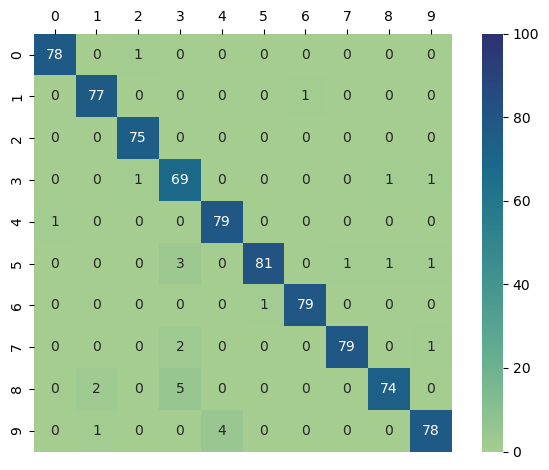

In [37]:
ax = sns.heatmap(confusion_matrix(pred, test_labels), square=True, fmt='d' ,annot=True, cmap='crest', vmax=100)
ax.xaxis.tick_top()
plt.tight_layout()